## Observations and Insights 

Observations:
    1. Overall, mice treated with Capomulin or Ramicane showed decreasing tumor volumes over the course of the study while mice treated with Infubinol or Ceftamin showed increasing tumor sizes over the same time period.
    2. There is a strong positive correlation between the average weight of the mice and the average tumor volume over the study period, and there are very few outliers in the dataset.
    3. It may be inferred that a mouse's weight can be used to reasonably predict the tumor size at the end of the treatment, depending on the drug regimen applied.

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st    # try using scikit-learn rather than scipy
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merged = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_study_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_study_merged["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_merged[mouse_study_merged.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_merged.loc[mouse_study_merged["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_merged[mouse_study_merged["Mouse ID"] != "g989"]    # To drop only the duplicate rows but keep mouse g989, I would have used df.drop_duplicates().
mouse_study_clean.head()                                                            # Not sure which values for tumor volume and metastatic sites are correct, so I opted to drop the mouse from the analysis altogether, rather than only dropping the duplicate rows.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tvol_mean = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tvol_median = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].median()
tvol_var = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].var()
tvol_stddev = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].std()
tvol_sem = mouse_study_clean.groupby(mouse_study_clean["Drug Regimen"])["Tumor Volume (mm3)"].sem()

stats_df = pd.DataFrame({
    "Tumor Volume_mean": tvol_mean,
    "tvol_median": tvol_median,
    "Tumor Volume_var": tvol_var,
    "Tumor Volume_stddev": tvol_stddev,
    "Tumor Volume_sem": tvol_sem,
},
    index=mouse_study_clean["Drug Regimen"].unique()
) 
stats_df


,Tumor Volume_mean,tvol_median,Tumor Volume_var,Tumor Volume_stddev,Tumor Volume_sem
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

mouse_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

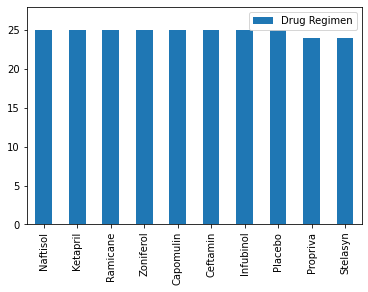

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treatment_count = mouse_study_clean.groupby(["Mouse ID"])["Drug Regimen"].first().value_counts().to_frame()
treatment_count.plot(kind="bar", figsize=(6, 4))
plt.ylim(0, 28)
plt.show()

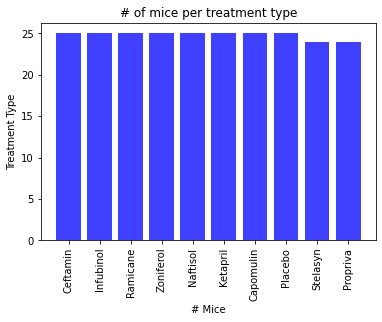

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_axis = mouse_study_clean.groupby(["Mouse ID"])["Drug Regimen"].first().value_counts()
x_axis = np.arange(len(y_axis))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Ceftamin", "Infubinol", "Ramicane", "Zoniferol", "Naftisol", "Ketapril", "Capomulin", "Placebo", "Stelasyn", "Propriva"]) # how to do this without directly specifying label names? try sort_values(descending)
plt.title("# of mice per treatment type")
plt.xlabel("# Mice")
plt.ylabel("Treatment Type")
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")
plt.xticks(rotation=90)
plt.show()

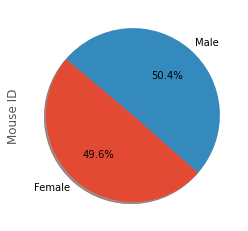

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Female", "Male"]
m_f_count = mouse_study_clean.groupby(["Sex"])["Mouse ID"].nunique()
m_f_count.plot(kind="pie", autopct="%1.1f%%", shadow=True, startangle=140);
plt.show()


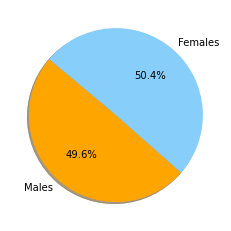

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
m_f_count = mouse_study_clean.groupby(["Sex"])["Mouse ID"].nunique()
labels = ["Males", "Females"]
colors = ["orange", "lightskyblue"]
plt.pie(m_f_count, explode=None, labels=labels, colors=colors,
autopct="%1.1f%%", shadow=True, startangle=140);
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = mouse_study_clean.groupby(["Mouse ID"])["Timepoint"].max().to_frame() # now add tumor vol for each mouse at that max timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tvol_final = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].groupby(["Mouse ID"])["Drug Regimen", "Tumor Volume (mm3)"].last() # last() works because the last timepoint is listed last
tvol_sorted = tvol_final.sort_values(by="Tumor Volume (mm3)")

# tvol_final = pd.DataFrame()
# pd.merge(mouse_study_clean, last_timepoint_df, how="inner", on="Mouse ID", suffixes=("", "_last"))
# tvol_last_timepoint = mouse_study_clean.loc[mouse_study_clean["Timepoint"].max()]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.  ## for each drug regimen or for the dataset as a whole?
q1 = np.percentile(tvol_sorted["Tumor Volume (mm3)"], 25)
q2 = np.percentile(tvol_sorted["Tumor Volume (mm3)"], 50)
q3 = np.percentile(tvol_sorted["Tumor Volume (mm3)"], 75)
tumor_vol_iqr = q3 - q1
lower_bound = q1 - (1.5 * tumor_vol_iqr)
upper_bound = q3 + (1.5 * tumor_vol_iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volumes_Capomulin = tvol_sorted.loc[tvol_sorted["Drug Regimen"] == treatments[0]]["Tumor Volume (mm3)"]
tumor_volumes_Ramicane = tvol_sorted.loc[tvol_sorted["Drug Regimen"] == treatments[1]]["Tumor Volume (mm3)"]
tumor_volumes_Infubinol = tvol_sorted.loc[tvol_sorted["Drug Regimen"] == treatments[2]]["Tumor Volume (mm3)"]
tumor_volumes_Ceftamin = tvol_sorted.loc[tvol_sorted["Drug Regimen"] == treatments[3]]["Tumor Volume (mm3)"]

    # add subset
tumor_volumes = [tumor_volumes_Capomulin, tumor_volumes_Ramicane, tumor_volumes_Infubinol, tumor_volumes_Ceftamin]    
    
    # Determine outliers using upper and lower bounds
for tumor_size in tumor_volumes_Capomulin:
    if (tumor_size > upper_bound) or (tumor_size < lower_bound):
        tumor_vol_data.append(tumor_size)
        
for tumor_size in tumor_volumes_Ramicane:
    if (tumor_size > upper_bound) or (tumor_size < lower_bound):
        tumor_vol_data.append(tumor_size)
        
for tumor_size in tumor_volumes_Infubinol:
    if (tumor_size > upper_bound) or (tumor_size < lower_bound):    # Should have one outlier for this drug regimen (see boxplot). Would need to establish upper and lower bounds for outliers based on each subset by drug regimen.
        tumor_vol_data.append(tumor_size)
        
for tumor_size in tumor_volumes_Ceftamin:
    if (tumor_size > upper_bound) or (tumor_size < lower_bound):
        tumor_vol_data.append(tumor_size)

tumor_vol_data        

[]

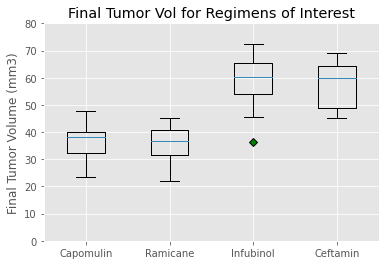

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')  # setting properties for potential outliers

plt.title("Final Tumor Vol for Regimens of Interest")
plt.boxplot(tumor_volumes, labels=treatments, flierprops=green_diamond)
plt.ylabel("Final Tumor Volume (mm3)")
plt.ylim(0, 80)
plt.show()

## Line and Scatter Plots

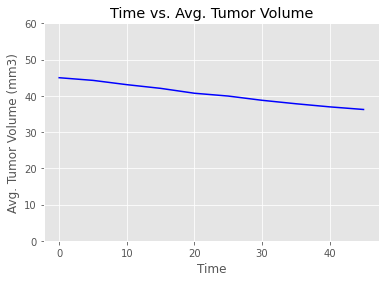

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

filter_df =  mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]  # Opted to show line plot of all mice, rather than one mouse, treated with Capomulin to see the trend across the board.
gp_df = filter_df.groupby(["Timepoint"])                                              # To show line plot for one mouse, would simply specify the mouse by its ID rather than grouping by Timepoint.

time = gp_df.groups.keys()
volume = gp_df.mean()["Tumor Volume (mm3)"]

plt.title("Time vs. Avg. Tumor Volume")
plt.xlabel("Time")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.ylim(0, 60)
plt.plot(time, volume, color='b')
plt.show()

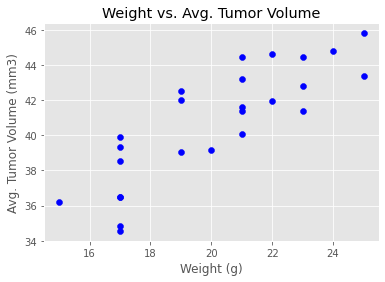

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"])["Weight (g)"].mean()
volume = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.title("Weight vs. Avg. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")

plt.scatter(weight, volume, color='blue', label="Data Points")
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# re-work using scikit-learn
np_r = np.corrcoef(weight, volume)
sci_r = st.stats.pearsonr(weight, volume)
pd_r = weight.corr(volume)
pd_r

0.8419363424694717

In [21]:
slope, intercept, r, p, stderr = st.linregress(weight, volume)
line = f"Regression line: y ={intercept: .2f} + {slope:.2f}x, r ={r: .2f}"
line

'Regression line: y = 21.55 + 0.95x, r = 0.84'

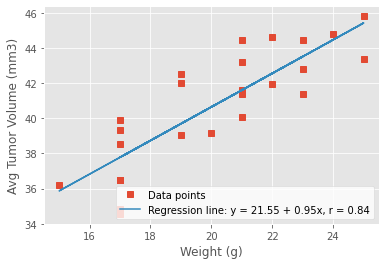

In [22]:
plt.style.use('ggplot')
# plot using pandas, plot using matplotlib
fig, ax = plt.subplots()
ax.plot(weight, volume, linewidth=0, marker='s', label='Data points')
ax.plot(weight, intercept + slope * weight, label=line)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Avg Tumor Volume (mm3)')
ax.legend(facecolor='white')
plt.show()

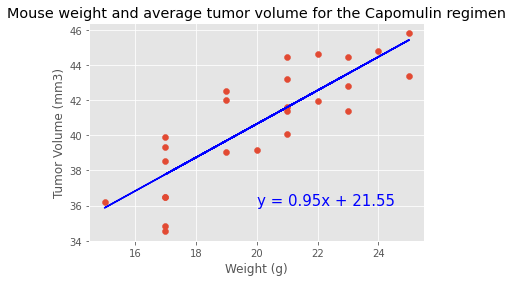

In [23]:
# Defining function to be used multiple times in the future
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"b")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="b")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
plot_linear_regression(weight,volume, "Mouse weight and average tumor volume for the Capomulin regimen", "Weight (g)", "Tumor Volume (mm3)", (20,36))